\begin{center} 
Chun-Yuan (Scott) Chiu 
\end{center}

\begin{center} 
chunyuac@andrew.cmu.edu 
\end{center} 

# 1. {-}

## (a) {-}

First we write the OLS objective function part as
\begin{align*}
\lVert X^TY-\beta \rVert_2^2 &= (X^TY-\beta)^T(X^TY-\beta) \\
&= (Y^TX-\beta^T)(X^TY-\beta) \\
&= Y^TXX^TY - 2\beta^TX^TY + \beta^T\beta \\
&= Y^TXX^TY + \sum_{j=1}^p \left(\beta_j^2 - 2(X^TY)_j\beta_j\right). 
\end{align*}
where the third equation holds because $\beta^TX^TY$ is a scalar and is equal to its transpose $Y^TX\beta$. Thus for ridge regression we have 
\begin{align*}
\hat\beta_{ridge} &= \underset{\beta}{\text{argmin}} \lVert X^TY-\beta \rVert_2^2 + \lambda \lVert\beta \rVert_2^2 \\
&= \underset{\beta}{\text{argmin}} \left(Y^TXX^TY + \sum_{j=1}^p \left(\beta_j^2 - 2(X^TY)_j\beta_j\right) \right) + \lambda \sum_{j=1}^p\beta_j^2 \\
&= \underset{\beta}{\text{argmin}} \sum_{j=1}^p \left(\beta_j^2 - 2(X^TY)_j\beta_j\right) + \lambda \sum_{j=1}^p\beta_j^2 \\
&= \underset{\beta}{\text{argmin}} \sum_{j=1}^p \left((1+\lambda)\beta_j^2 - 2(X^TY)_j\beta_j\right).
\end{align*}
The $Y^TXX^TY$ term can be dropped because it does not depend on $\beta$. Similarly for the lasso we have
\begin{align*}
\hat\beta_{lasso} &= \underset{\beta}{\text{argmin}} \lVert X^TY-\beta \rVert_2^2 + \lambda \lVert\beta \rVert_1 \\
&= \underset{\beta}{\text{argmin}} \sum_{j=1}^p \left(\beta_j^2 - 2(X^TY)_j\beta_j\right) + \lambda \sum_{j=1}^p|\beta_j| \\
&= \underset{\beta}{\text{argmin}} \sum_{j=1}^p \left(\beta_j^2 - 2(X^TY)_j\beta_j + \lambda |\beta_j|\right).
\end{align*}

## (b) {-}

For ridge regression the objective function is a quadratic function of $\beta_j$. Completing the square shows that the minimizer is
\begin{align*}
\hat\beta_j = \frac{(X^TY)_j}{1+\lambda}. 
\end{align*}


For the lasso, the objective is non-differentiable at $\beta_j = 0$. If $\beta_j > 0$, it is $\beta_j^2 -(2(X^TY)_j - \lambda) \beta_j$ and the minimizer is $\hat \beta_j = (X^TY)_j - \lambda/2$, provided it is positive. If it is not, the minimizer is simply zero. Similarly, if $\beta_j \leq 0$, the objective function is $\beta_j^2 -(2(X^TY)_j + \lambda) \beta_j$ and the minimizer is $\hat \beta_j = (X^TY)_j + \lambda/2$ provided it is negative. If it is not, the minimizer is again zero. In summary, 
\begin{align*}
\hat\beta_j = \begin{cases}
(X^TY)_j - \lambda/2 &\mbox{ if } (X^TY)_j > \lambda/2\\
(X^TY)_j + \lambda/2 &\mbox{ if } (X^TY)_j < -\lambda/2\\
0 &\mbox{ otherwise } 
\end{cases}.
\end{align*}


## (c) {-}

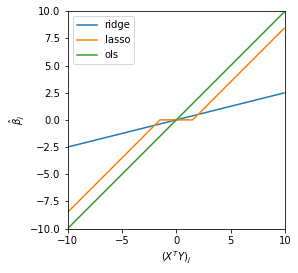

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame, Series

lam = 3

def lassoBetaj(z):
    if z > lam/2:
        return z - lam/2
    elif z < -lam/2:
        return z + lam/2
    else:
        return 0

ax = DataFrame([(z, z/(lam+1), lassoBetaj(z), z) for z in np.arange(-10, 10, 0.1)], columns=['x', 'ridge', 'lasso', 'ols']).set_index('x').plot()
ax.set(xlabel='$(X^TY)_j$', ylabel='$\hat\\beta_j$', xlim=[-10, 10], ylim=[-10, 10], aspect=1)
plt.show()

## (d) {-}

Setting $\lambda=0$ in either ridge or the lasso minimizer $\hat\beta_j$, we obtain the OLS minimizer $\hat \beta_j = (X^TY)_j$. As shown in the above figure, with $\lambda > 0$, both ridge and the lasso coefficient is smaller than the OLS one, but when the magnitude of $(X^TY)_j$ is large (much larger than $\lambda/2$), the magnitude of the corresponding lasso coefficient goes up in the same speed as the OLS one, while that of ridge regression goes up slower ($1/(\lambda+1)$ of the speed to be exact) and hence is smaller than the lasso coefficient. So ridge shrinks large coefficients more than lasso. 


On the other hand, when the magnitude of $(X^TY)_j$ is smaller than $\lambda/2$, the lasso regression shrinks a nonzero coefficient to zero, while ridge only divide it by $(\lambda +1)$, still nonzero. So, roughly speaking, the lasso regression has larger impact on small coefficients. 


From the figure it is also clear that, as we increase the value of $\lambda$, the lasso regression will shrink all coefficients to zero eventually. 

# 2. {-}

As the results shown below, as $p$ goes up, the average mean squared OLS prediction error goes up superlinearly, while the lasso prediction error does not seem to go up (or maybe it does, just not obvious from our visualization). Below 100 simulations are performed for each $p$. 

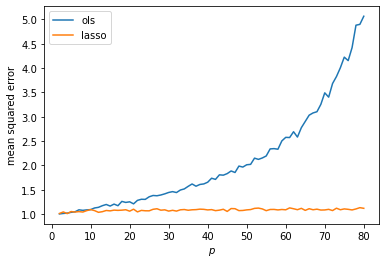

In [16]:
from sklearn.linear_model import Lasso
from scipy.stats import norm
from pandas import Series, DataFrame
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

n_sim = 100

n = 100
m = 100

def mse(p, method):
    trainX = DataFrame({'X%02d'%(i+1) : norm.rvs(size=n) for i in range(p)})
    trainY = 4*trainX['X01'] + norm.rvs(size=n)

    testX = DataFrame({'X%02d'%(i+1) : norm.rvs(size=m) for i in range(p)})
    testY = 4*testX['X01'] + norm.rvs(size=m)

    if method=='ols':
        model = sm.OLS(exog=trainX, endog=trainY).fit()
        params = model.params
    elif method=='lasso':
        model = Lasso(alpha=np.sqrt(0.02*np.log(p)/n), normalize=True).fit(trainX, trainY)
        params = model.coef_
        
    return ((testY - (testX @ params))**2).mean()
        
def avg_mse(p, method):
    return np.mean([mse(p, method) for _ in range(n_sim)])

ps = range(2, 81)
ax = DataFrame({'p': ps, 
                'ols': [avg_mse(p, method='ols') for p in ps], 
                'lasso': [avg_mse(p, method='lasso') for p in ps], 
               }).set_index('p').plot()
ax.set_ylabel('mean squared error')
ax.set_xlabel('$p$')
plt.show()

# 3. {-}

## (a) {-}

In [16]:
from pandas import read_csv

trends = read_csv('trends_train.csv').set_index('Week').applymap(float)
trends.shape

(180, 97)

In [3]:
import rpy2
%load_ext rpy2.ipython

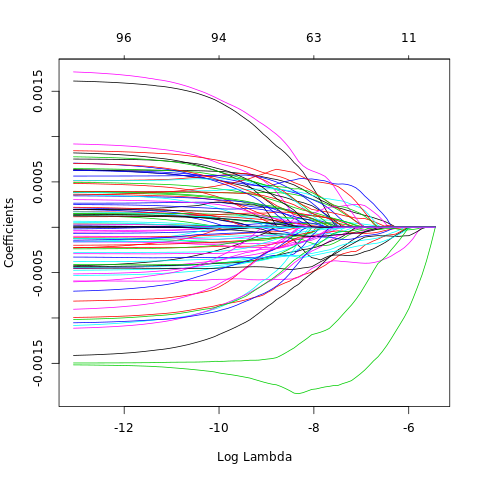

In [17]:
%%R -i trends
library(glmnet)

# the final column is the response

trends = as.matrix(trends)
fit = glmnet(trends[,-97], trends[,97])
plot(fit, xvar = "lambda")

## (b) {-}

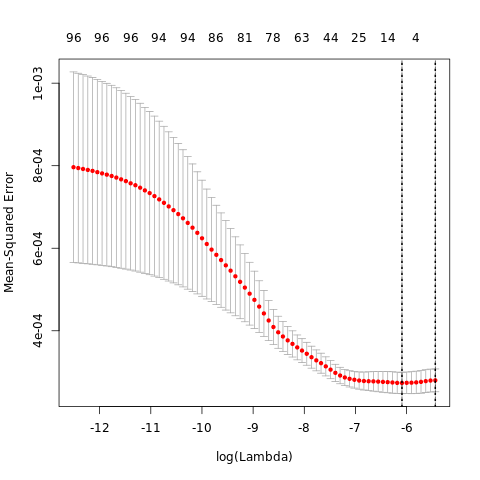

In [18]:
%%R
set.seed(0)
cvglmout = cv.glmnet(trends[,-97], trends[,97])

plot(cvglmout,lwd=2)
abline(v=log(cvglmout$lambda.min),lty=3,lwd=2)
abline(v=log(cvglmout$lambda.1se),lty=3,lwd=2)

## (c) {-}

The below R code prints out nonzero coefficients. Using $\lambda_{\min}$, there are 12 nonzero coefficients including the intercept. Using $\lambda_{1\text{s.e.}}$, there is only one (the intercept). Plus, the above cross-validation curve reaches its minimum almost at the bottom right corner. All these suggest that the predictors have little to no signal for weekly stock return prediction. 

In [19]:
%%R

beta_lasso_min = coef(fit, s=cvglmout$lambda.min)
beta_lasso_min_nz = beta_lasso_min[beta_lasso_min!=0]
print(beta_lasso_min_nz)

beta_lasso_1se = coef(fit, s=cvglmout$lambda.1se)
beta_lasso_1se_nz = beta_lasso_1se[beta_lasso_1se!=0]
print(beta_lasso_1se_nz)


R[write to console]: <sparse>[ <logic> ] : .M.sub.i.logical() maybe inefficient



 [1]  1.643469e-03 -2.004550e-05 -3.153716e-05 -5.304563e-06 -2.240417e-04
 [6] -4.487841e-06 -9.892606e-04 -2.098079e-06 -9.486248e-05 -3.147563e-05
[11] -4.343406e-05 -6.782457e-05


R[write to console]: <sparse>[ <logic> ] : .M.sub.i.logical() maybe inefficient



[1] 0.001572434


## (d) {-}

Below is the scatterplot of the weekly stock log returns against the fitted values by the lasso prediction with $\lambda_{\min}$. There does not seem to be any obvious pattern. 

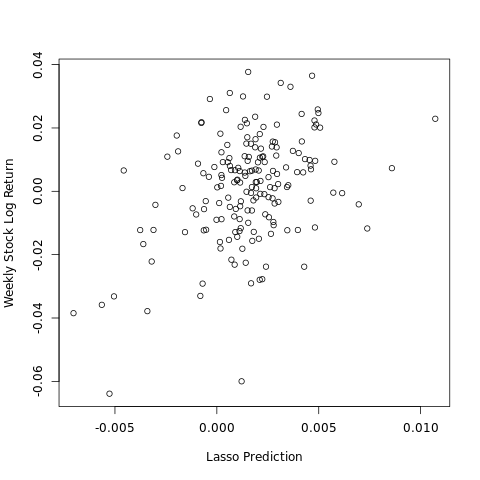

In [25]:
%%R

prediction = predict(fit, newx=trends[,-97], s=cvglmout$lambda.min)
logret = trends[,97]

plot(x=prediction, y=logret, xlab='Lasso Prediction', ylab='Weekly Stock Log Return')

## (e) {-}

It can be seen from the below results, in the period of time where training data were collected, a simple buy-and-hold strategy gives us an overall log return of 0.283, while buying and short selling according to the $\lambda_{\min}$ model prediction gives us a (much) better overall log return of 0.8. 

In [22]:
%%R
sum(logret)

[1] 0.2830381


In [23]:
%%R
t(sign(prediction)) %*% logret

       [,1]
1 0.8006779


## (f) {-}

Now we read in the test data and perform prediction using the $\lambda_{\min}$ model trained above. Below is the scatterplot of the fitted values against the true values. 

In [26]:
from pandas import read_csv

trends_test = read_csv('trends_test.csv').set_index('Week').applymap(float)
trends_test.shape

(79, 97)

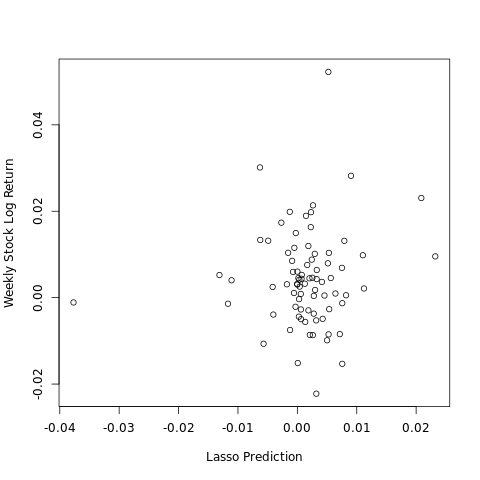

In [30]:
%%R -i trends_test

trends_test = as.matrix(trends_test)
prediction_test = predict(fit, newx=trends_test[,-97], s=cvglmout$lambda.min)

logret_test = trends_test[,97]

plot(x=prediction_test, y=logret_test, xlab='Lasso Prediction', ylab='Weekly Stock Log Return')

As shown in the below results, in the period of time where *test* data were collected, a simple buy-and-hold strategy gives us an overall log return of 0.346, while buying and short selling according to the $\lambda_{\min}$ model prediction only gives us an overall log return of 0.065, which is much worse. 

Since the $\lambda_\text{1s.e.}$ model only has intercept, this model simply says always use the mean $\bar y$ (from training data) as a prediction, which is positive as we have seen that the sum of responses in training data is positive. Thus, the $\lambda_\text{1s.e.}$ model gives us the simple buy-and-hold strategy, which we have seen outperforms the strategy based on the $\lambda_{\min}$ model on test data. 

In [31]:
%%R
sum(logret_test)

[1] 0.3461536


In [32]:
%%R
t(sign(prediction_test)) %*% logret_test

        [,1]
1 0.06499931
